In [1]:
# default quiskit imports below
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [3]:
# additional imports
import numpy as np
# IBMQ.providers(
provider = IBMQ.get_provider(group='open')
# provider.backends()
backend_q = provider.get_backend('ibmq_burlington')

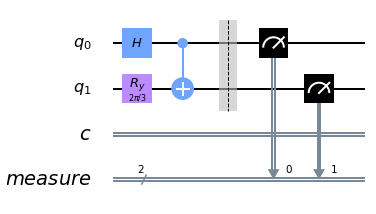

In [10]:
from math import pi
qc = QuantumCircuit(2, 1)
qc.h(0)
qc.ry(2*pi/3, 1)
qc.cx(0, 1)
qc.measure_all()
qc.draw()

In [13]:
job_q = execute(qc, backend_q)

from qiskit.tools.monitor import job_monitor
job_monitor(job_q)

Job Status: job has successfully run


In [15]:
result_q = job_q.result()
counts_q = result_q.get_counts(qc)
print(counts_q)

{'01 0': 285, '10 0': 277, '00 0': 279, '11 0': 183}


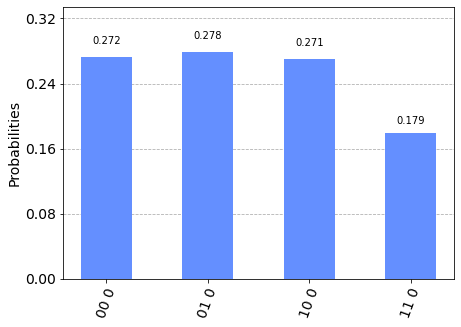

In [16]:
from qiskit.visualization import plot_histogram
plot_histogram(counts_q)

Z obliczeń matematycznych wynika, że te prawdopodobieństwa powinny być równe. Innym sposobem spojrzenia na problem może być to, że qbit kontrolny po bramce H ma równe prawdopodobieństwa, więc wykonanie bramki Ry(phi) nie ma znaczenia dla układu (poza wprowadzeniem błędu). Jednak jak już widzieliśmy w poprzedniej części zadania błąd ma istotne znaczenie i stąd wynikają różnice w prawdopodobieństwach.